In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 40% !important;} </style>" 

## Reading data from csv-file

In [2]:
titanic_data = pd.read_csv('../Data/titanic/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Researching dataset

In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Preparation X and y value

In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = titanic_data.Survived

In [7]:
X = pd.get_dummies(X)
X = X.drop(['Sex_male'], axis=1)
X = X.fillna({'Age': X.Age.median()})

In [55]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0


## Creating a classifier

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

## Visualization of Decision Tree Classifier 

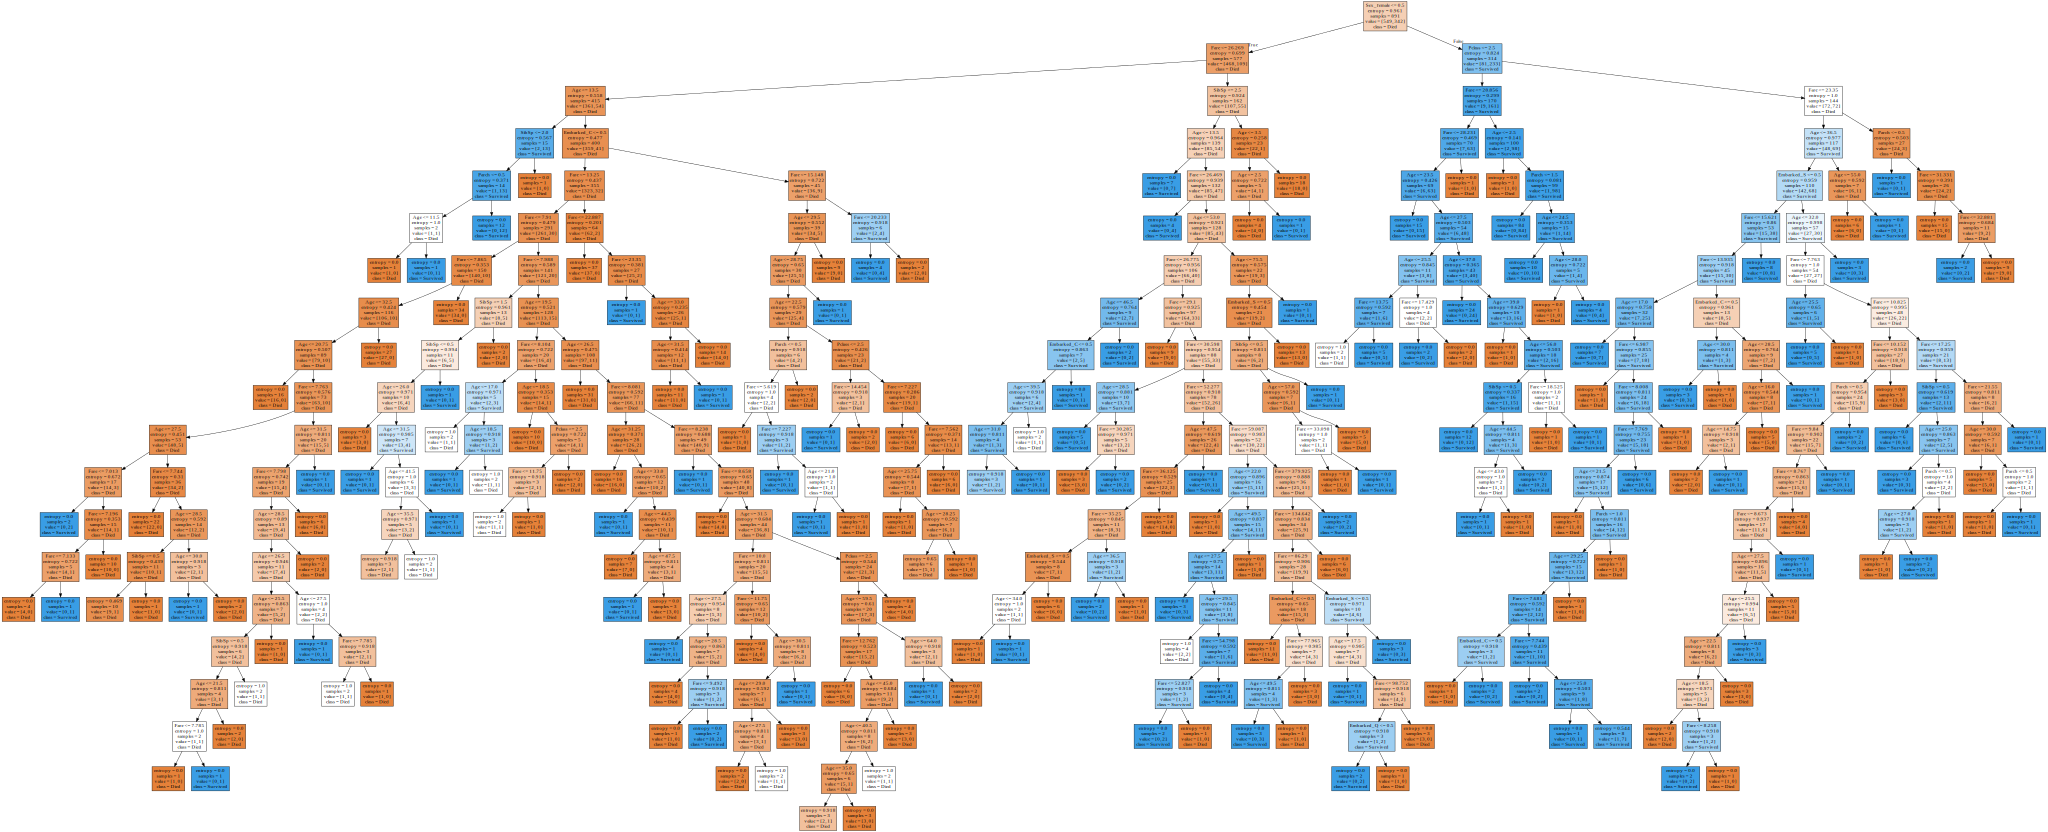

In [13]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

This is score for build classificator for train data

In [15]:
clf.score(X, Y)

0.9797979797979798

# Improvement of classifier

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

Train score

In [16]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

Test score 

In [17]:
clf.score(X_test, y_test)

0.7796610169491526

## Improved Decision Tree Classifier and Visualization of Decision Tree Classifier
After the cross-validation process 'best parameters' were found. The max depth of the tree is 7 and max leaf nodes count is 10.

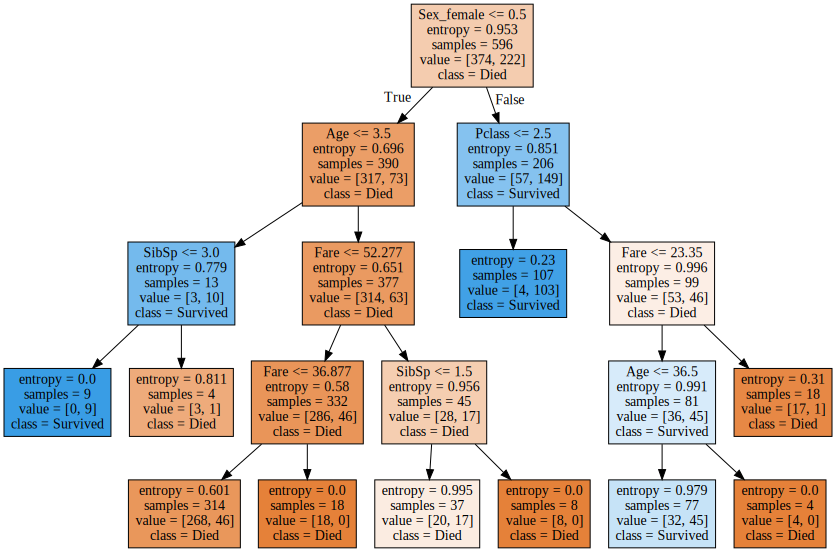

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10)
clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

Train score was reduced

In [19]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8305369127516778

Test score was improved

In [20]:
clf.score(X_test, y_test)

0.823728813559322

## Cross-validation process for finding max depth parameter

In [21]:
scores_data = pd.DataFrame()

In [22]:
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [23]:
scores_data.head(15)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350
0,6,0.867450,0.766102,0.803754
0,7,0.882550,0.786441,0.798697
0,8,0.909396,0.793220,0.798683
0,9,0.917785,0.803390,0.793627
0,10,0.926174,0.800000,0.791947


In [24]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [25]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.778571
293,96,cross_val_score,0.770182
294,97,cross_val_score,0.765140
295,98,cross_val_score,0.773543


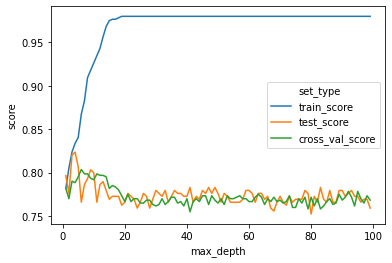

In [26]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [27]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.791947


## Automatically search for best parameters

In [28]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [29]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [30]:
best_clf = grid_search_cv_clf.best_estimator_

In [31]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [32]:
best_clf.score(X_test, y_test)

0.7694915254237288

## Success metrics

In [33]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.8023255813953488

In [34]:
recall_score(y_test, y_pred)

0.575

In [35]:
y_pred_prob = best_clf.predict_proba(X_test)

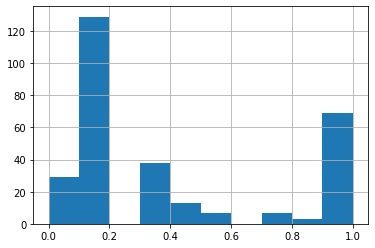

In [36]:
pd.Series(y_pred_prob[:, 1]).hist()

In [37]:
y_pred = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

In [38]:
precision_score(y_test, y_pred)

0.8611111111111112

In [39]:
recall_score(y_test, y_pred)

0.5166666666666667

In [40]:
y_pred = np.where(y_pred_prob[:, 1] > 0.9, 1, 0)

In [41]:
precision_score(y_test, y_pred)

0.8840579710144928

In [42]:
recall_score(y_test, y_pred)

0.5083333333333333

## ROC curve

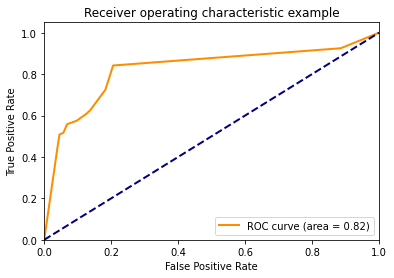

In [43]:
from sklearn.metrics import roc_curve, auc
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()